# Étude statistique sur les saumons 
## Analyse des données de pêche

### Objectif
Premier rendu du projet de statistique. Etude statistique univariée de 4 variables de types différents 

**Plan :**
1. Chargement des bibliothèques et des données
2. Variable 1 : Month Number
3. Variable 2 : Netting effort
4. Variable 3 : Wild MSW Weight (kg)
5. Variable 4 : Farms MSW Weight (kg)

## Chargement des données

In [151]:
# Chargement des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
# Chargement des données
saumons = pd.read_csv("saumons.csv", sep=',')

# Vérifier les premières lignes du DataFrame
print(saumons.head())

  District  District ID  Report order Region                   Method    Year  \
0    Tweed        101.0           1.0   East   Fixed Engine: Retained  1952.0   
1    Tweed        101.0           1.0   East  Net and Coble: Retained  1952.0   
2    Tweed        101.0           1.0   East   Fixed Engine: Retained  1952.0   
3    Tweed        101.0           1.0   East  Net and Coble: Retained  1952.0   
4    Tweed        101.0           1.0   East   Fixed Engine: Retained  1952.0   

      Month  Month number  Wild MSW number  Wild MSW weight (kg)  ...  \
0  February           2.0            107.0                 400.5  ...   
1  February           2.0           6606.0               24856.9  ...   
2     March           3.0            185.0                 703.1  ...   
3     March           3.0           7008.0               26151.9  ...   
4     April           4.0            484.0                1912.3  ...   

   Wild 1SW weight (kg)  Sea trout number  Sea trout weight (kg)  \
0     

In [154]:
print(saumons.columns)

Index(['District', 'District ID', 'Report order', 'Region', 'Method', 'Year',
       'Month', 'Month number', 'Wild MSW number', 'Wild MSW weight (kg)',
       'Wild 1SW number', 'Wild 1SW weight (kg)', 'Sea trout number',
       'Sea trout weight (kg)', 'Finnock number', 'Finnock weight (kg)',
       'Farmed MSW number', 'Farmed MSW weight (kg)', 'Farmed 1SW number',
       'Farmed 1SW weight (kg)', 'Netting effort'],
      dtype='object')


## Variable 1 : Month Number

In [158]:
# Statistiques descriptives
month_counts = saumons["Month number"].value_counts().sort_index()
month_frequencies = month_counts / month_counts.sum()
mean_captures = month_counts.mean()
median_captures = month_counts.median()
std_captures = month_counts.std()

# Trouver les mois avec le maximum et minimum de captures
max_month = month_counts.idxmax()
min_month = month_counts.idxmin()

print(f"Moyenne des captures par mois : {mean_captures:.2f}")
print(f"Médiane des captures par mois : {median_captures:.2f}")
print(f"Écart-type des captures : {std_captures:.2f}")
print(f"Le mois avec le plus de captures est : {max_month} ({month_counts[max_month]} captures)")
print(f"Le mois avec le moins de captures est : {min_month} ({month_counts[min_month]} captures)")

Moyenne des captures par mois : 2314.00
Médiane des captures par mois : 1845.50
Écart-type des captures : 1900.61
Le mois avec le plus de captures est : 7.0 (4978 captures)
Le mois avec le moins de captures est : 10.0 (1 captures)


In [160]:
# Fréquence des captures par mois 
df_frequencies = pd.DataFrame({
        "Month Number": month_counts.index,
        "Count": month_counts.values,
        "Frequency": month_frequencies.values
    })
print("Fréquence des captures par mois :")
print(df_frequencies)

Fréquence des captures par mois :
   Month Number  Count  Frequency
0           2.0   1039   0.044901
1           3.0   1461   0.063137
2           4.0   2230   0.096370
3           5.0   3428   0.148142
4           6.0   4462   0.192826
5           7.0   4978   0.215125
6           8.0   4514   0.195073
7           9.0   1026   0.044339
8          10.0      1   0.000043
9          11.0      1   0.000043


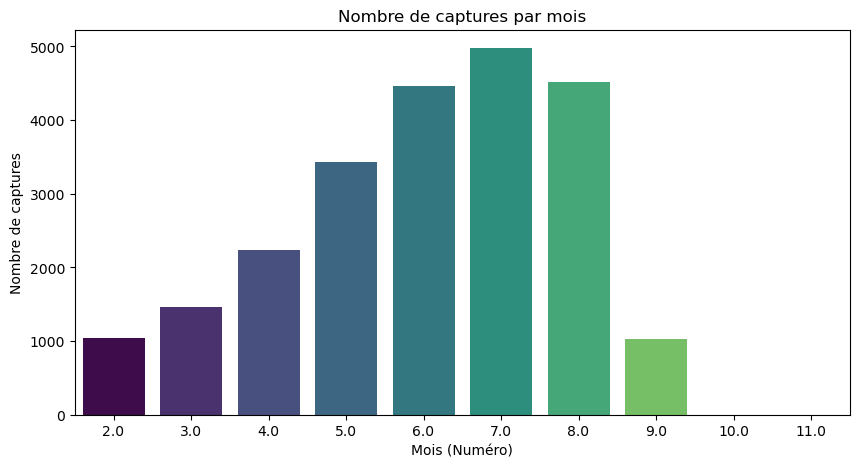

In [162]:
# Graphique en barres
plt.figure(figsize=(10, 5))
sns.barplot(x=month_counts.index, y=month_counts.values, hue=month_counts.index, palette="viridis", legend=False)
plt.xlabel("Mois (Numéro)")
plt.ylabel("Nombre de captures")
plt.title("Nombre de captures par mois")
plt.show()

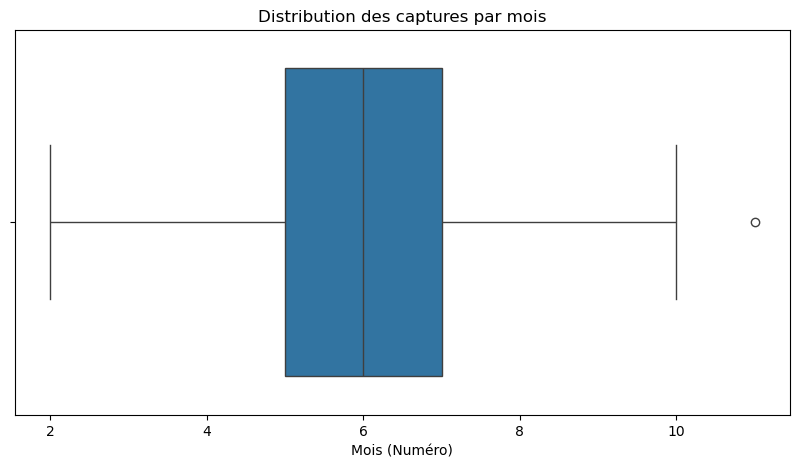

In [163]:
# Boxplot pour voir la dispersion des captures
plt.figure(figsize=(10, 5))
sns.boxplot(x=saumons["Month number"])
plt.xlabel("Mois (Numéro)")
plt.title("Distribution des captures par mois")
plt.show()

<Figure size 1200x600 with 0 Axes>

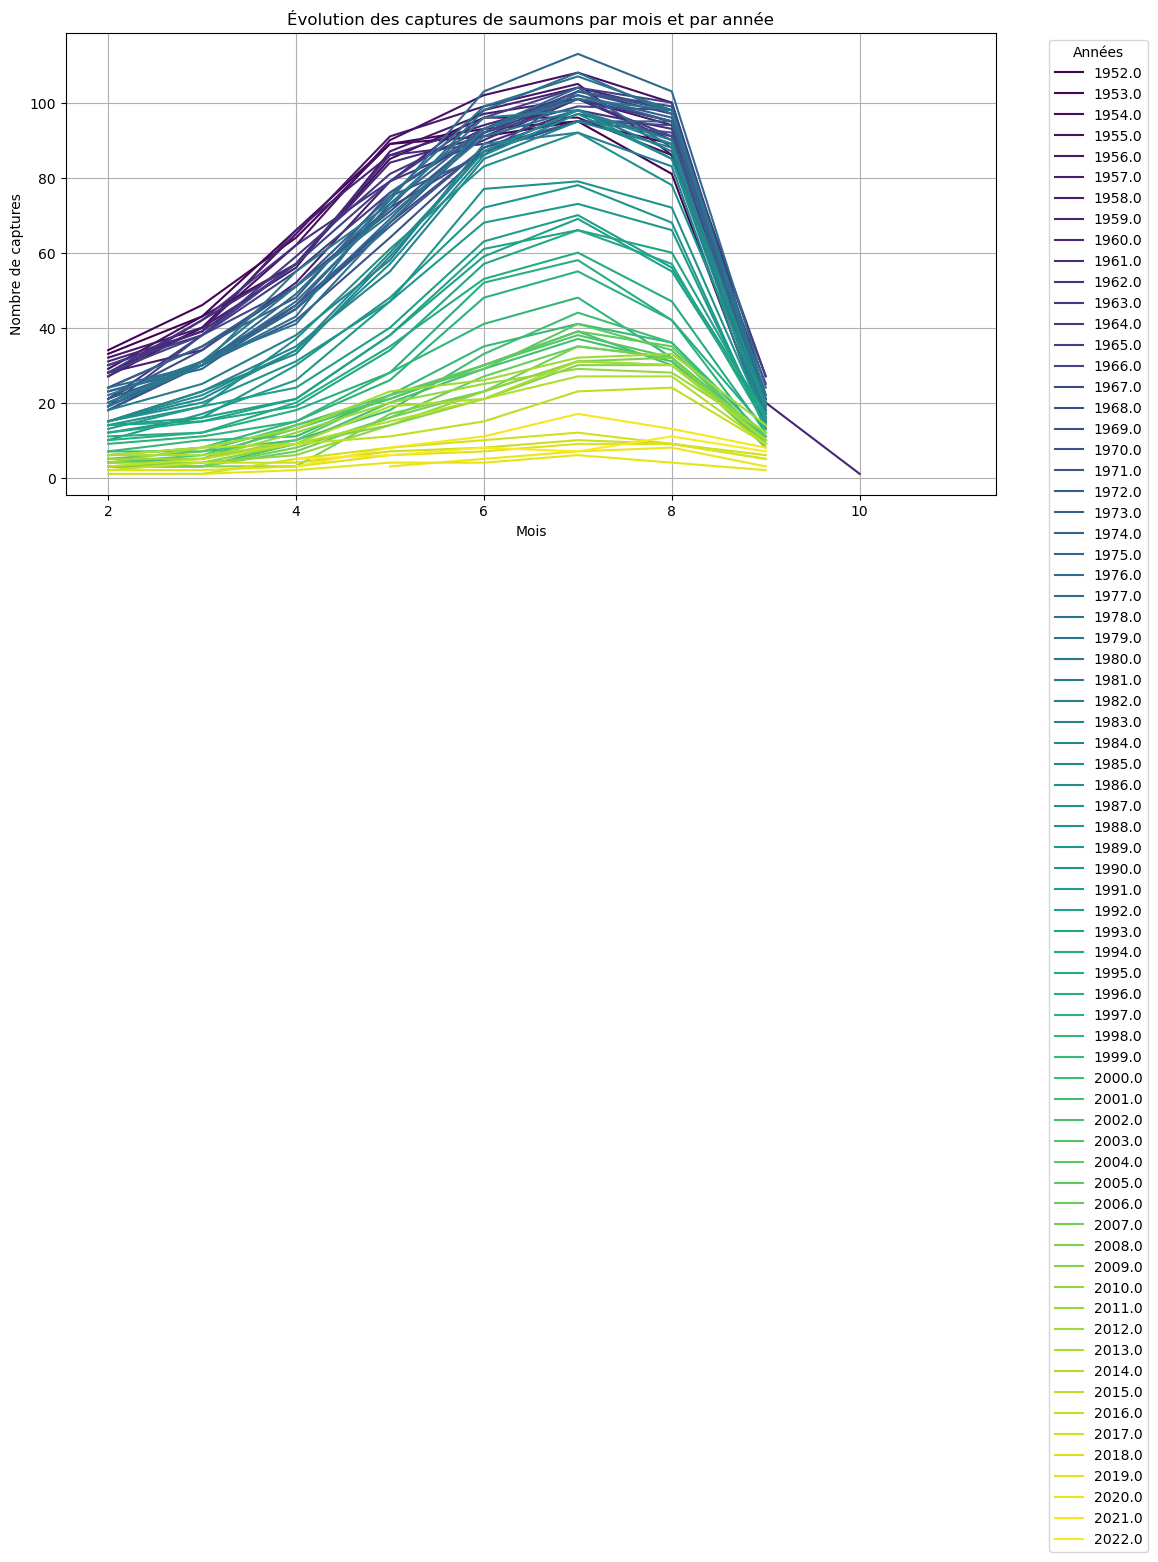

In [164]:
 # Analyse temporelle, évolution des captures par année
yearly_captures = saumons.groupby(["Year", "Month number"]).size().unstack()

plt.figure(figsize=(12, 6))
yearly_captures.T.plot(kind="line", figsize=(12, 6), colormap="viridis")
plt.xlabel("Mois")
plt.ylabel("Nombre de captures")
plt.title("Évolution des captures de saumons par mois et par année")
plt.legend(title="Années", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

## Variable 2 : Netting effort

In [167]:
netting_eff = saumons.iloc[:, 20]
print("La deuxième variable étudiée contient les données suivantes :\n", var_2eme, "\n")

La deuxième variable étudiée contient les données suivantes :
 0         4.0
1        31.0
2        10.0
3        31.0
4        21.0
         ... 
23138     0.0
23139     0.0
23140     NaN
23141     NaN
23142     NaN
Name: Netting effort, Length: 23143, dtype: float64 



In [169]:
moyenne_eff = netting_eff.mean()
mediane_eff = netting_eff.median()
mode_eff = netting_eff.idxmax()
ecart_type_eff = netting_eff.std()
min_eff = netting_eff.min()
max_eff = netting_eff.max()
q1_eff = netting_eff.quantile(0.25)
q3_eff = netting_eff.quantile(0.75)
print("Moyenne :", moyenne_eff)
print("Mediane :", mediane_eff)
print("Mode :", mode_eff)
print("Ecart-type :", ecart_type_eff)
print("Minimum :", min_eff)
print("Maximum :", max_eff)
print("Quartile 1 :", q1_eff)
print("Quartile 3 :", q3_eff)

Moyenne : 24.137878133102852
Mediane : 3.0
Mode : 22344
Ecart-type : 146.27741843213622
Minimum : 0.0
Maximum : 2215.0
Quartile 1 : 1.0
Quartile 3 : 8.0


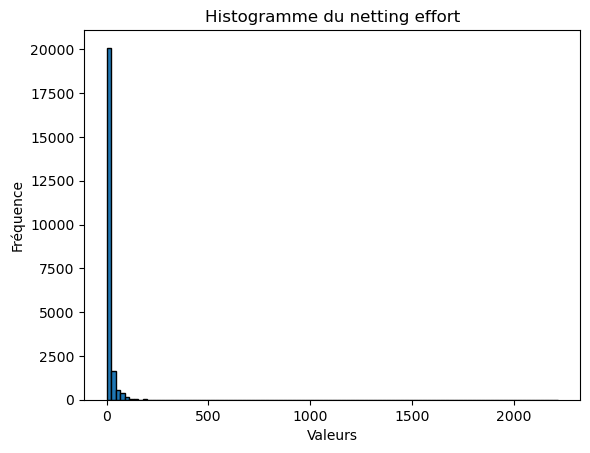

In [259]:
# Créer l'histogramme à partir de la colonne 'valeurs'
plt.hist(netting_eff, bins=100, edgecolor='black')

# Ajouter un titre et des labels
plt.title('Histogramme du netting effort')
plt.xlabel('Valeurs')
plt.ylabel('Fréquence')

# Afficher l'histogramme
plt.show()

## Variable 3 : Wild MSW Weight (kg)

In [171]:
var_3eme = saumons.iloc[:, 9]
# "9" car la troisième variable que nous étudions est la 10eme dans le tableau
print("Les données de la troisième variable sont :\n", var_3eme, "\n")

Les données de la troisième variable sont :
 0          400.5
1        24856.9
2          703.1
3        26151.9
4         1912.3
          ...   
23138       14.7
23139        5.0
23140        NaN
23141        NaN
23142        NaN
Name: Wild MSW weight (kg), Length: 23143, dtype: float64 



In [172]:
Poids_moyen_saumon = saumons["Wild MSW weight (kg)"] / saumons["Wild MSW number"]
#On extrait le poid moyen des saumons en divisant les poids de saumons récolté par le nombre de saumons (par mois)

In [173]:
#Statisques descriptives
print("Moyenne :", Poids_moyen_saumon.mean())
print("Médiane :", Poids_moyen_saumon.median())
print("Écart-type :", Poids_moyen_saumon.std())
print("Min :", Poids_moyen_saumon.min())
print("Max :", Poids_moyen_saumon.max())
print("Q1 :", Poids_moyen_saumon.quantile(0.25))
print("Q3 :", Poids_moyen_saumon.quantile(0.75))

Moyenne : 4.6279125637152285
Médiane : 4.563180272108843
Écart-type : 0.9061909021404962
Min : 0.39333333333333337
Max : 15.4
Q1 : 4.1011977321048905
Q3 : 5.1


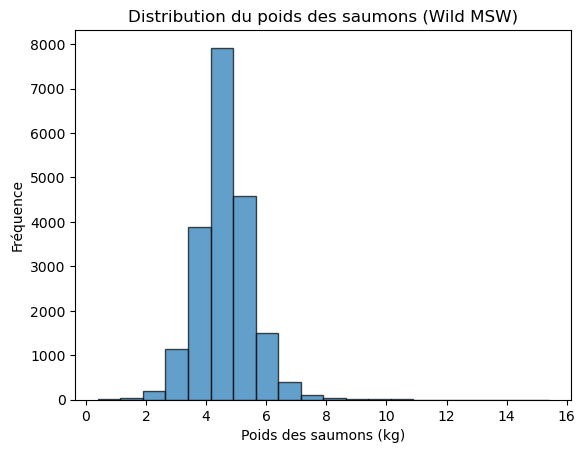

In [174]:
#Histograme
plt.hist(Poids_moyen_saumon, bins=20, edgecolor='black', alpha=0.7)  # Histogramme avec 20 intervalles
plt.xlabel("Poids des saumons (kg)")
plt.ylabel("Fréquence")
plt.title("Distribution du poids des saumons (Wild MSW)")
plt.show()
#Observations :
#Distribution en cloche bien marquée avec un pic autour de 4-5 kg
#Legère asymétrie sur la droite (la queue s'étend un peu plus vers les poids élevés).
#Diminution plus progressive après le pic, ce qui suggère qu'il y a quelques grands saumons plus rares.

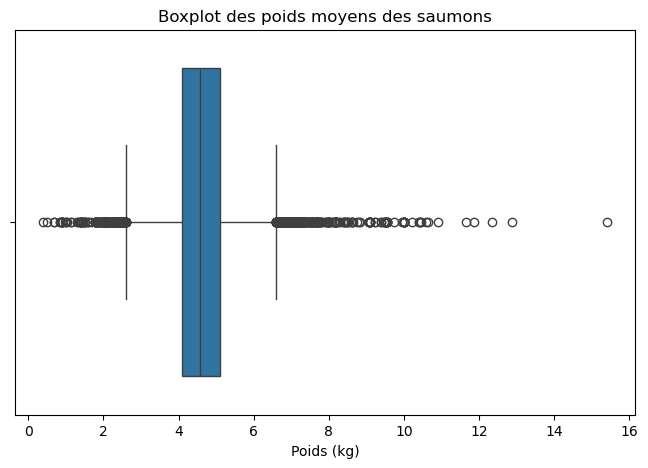

In [175]:
#Boxplot pour identifier les valeurs extrêmes et la dispersion des données.
plt.figure(figsize=(8, 5))
sns.boxplot(x=Poids_moyen_saumon)
plt.title("Boxplot des poids moyens des saumons")
plt.xlabel("Poids (kg)")
plt.show()

In [177]:
#Conclusion de la variable 3 :
#Le boxplot révèle la présence de plusieurs valeurs extrêmes au-delà de 10 kg, suggérant des individus atypiques dans l’échantillon.
#La majorité des saumons ont un poids compris entre environ 3 et 6 kg, avec une dispersion relativement contenue autour de la médiane.

## Variable 4 : Farms MSW Weight (kg)

In [181]:
#Etude de la variable quantitative continue : Farmed MSW weight (kg)

In [186]:
#Caclul de la moyenne 

In [188]:
moyenne = saumons["Farmed MSW weight (kg)"].mean()
print(moyenne)


0.42519014693171997


In [190]:
#Calcul de la médiane 

In [192]:
mediane = saumons["Farmed MSW weight (kg)"].median()
print(mediane)

0.0


In [194]:
mediane = saumons["Farmed 1SW weight (kg)"].median()
print(mediane)

0.0


In [195]:
#Calcul de l'écart type
ecarttype = saumons["Farmed MSW weight (kg)"].std()
print(ecarttype)

8.164855096819386


In [199]:
#On remarque une dispersion importante autour de la moyenne

In [200]:
#Caclul de la variance 

In [201]:
variance = saumons["Farmed MSW weight (kg)"].var()
print(variance)

66.6648587520575


In [202]:
#Affichage du poids minimum et maximum

In [203]:
min = saumons["Farmed MSW weight (kg)"].min()
print(min)
max = saumons["Farmed MSW weight (kg)"].max()
print(max)

0.0
621.8


In [204]:
#Mesure du premier quartile 

In [206]:
quartile25 = saumons["Farmed MSW weight (kg)"].quantile(0.25)
print(quartile25)

0.0


In [207]:
#Mesure du troisième quartile

In [208]:
quartile75 = saumons["Farmed MSW weight (kg)"].quantile(0.75)
print(quartile75)

0.0


In [209]:
#Mesure de l'écart interquartile 

In [210]:
Q1 = saumons["Farmed MSW weight (kg)"].quantile(0.25)
Q3 = saumons["Farmed MSW weight (kg)"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)


0.0


In [211]:
#Affichage de l'histogramme 


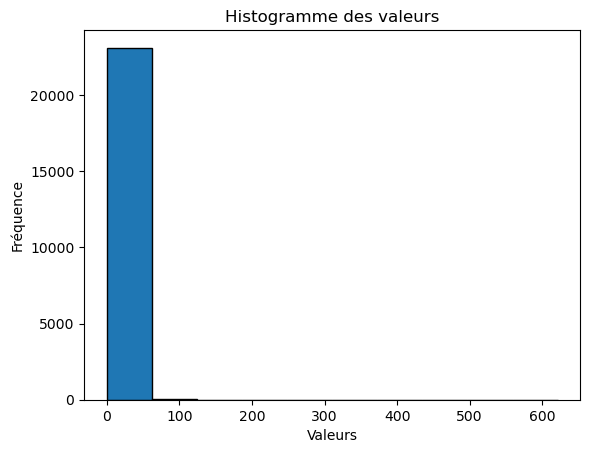

In [212]:


# Créer l'histogramme à partir de la colonne 'valeurs'
plt.hist(saumons['Farmed MSW weight (kg)'], bins=10, range=(0, 621), edgecolor='black')

# Ajouter un titre et des labels
plt.title('Histogramme des valeurs')
plt.xlabel('Valeurs')
plt.ylabel('Fréquence')

# Afficher l'histogramme
plt.show()
